<a href="https://colab.research.google.com/github/SandyDRawat/Self_Projects/blob/main/Stock%20Price%20Prediction/SP_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Price Prediction Project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/all_stocks_5yr.csv')
print(data.shape)
print(data.sample(7))


(619040, 7)
              date    open    high       low   close    volume  Name
148766  2018-02-05  162.31  163.38  156.4300  156.46    764655  CTAS
422558  2017-10-20   59.05   60.27   59.0200   60.00   3982224   NUE
235501  2015-07-21   33.85   33.95   33.4800   33.51   6896887  FOXA
563681  2017-12-21  222.90  223.94  221.3700  221.69   2955289   UNH
455768  2015-06-26   38.11   38.42   37.8600   38.24   3370174   PLD
397419  2016-10-12   16.88   17.04   16.6699   16.78  17901774    MU
434508  2016-01-21   52.29   53.30   51.7188   52.52   1897595     O


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [ ]:
companies  = ['AAPL','AMD','FB','GOOGL','AMZN','NVDA','EBAY','CSCO','IBM']

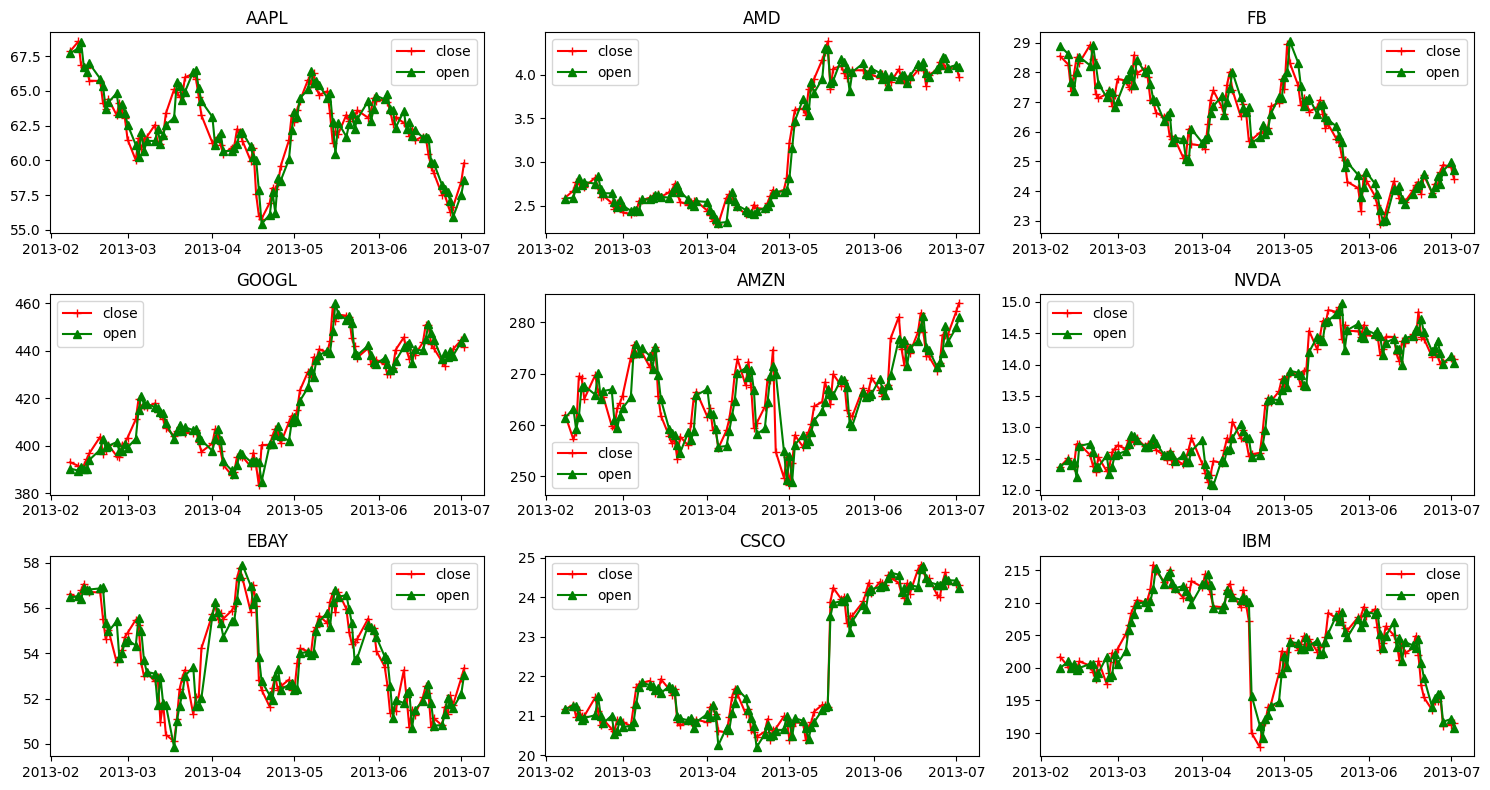

In [ ]:
data['date'] = pd.to_datetime(data['date'])
# date vs open
# date vs close
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
  plt.subplot(3, 3, index)
  c = data[data['Name'] == company][:100]
  plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
  plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
  plt.title(company)
  plt.legend()
  plt.tight_layout()


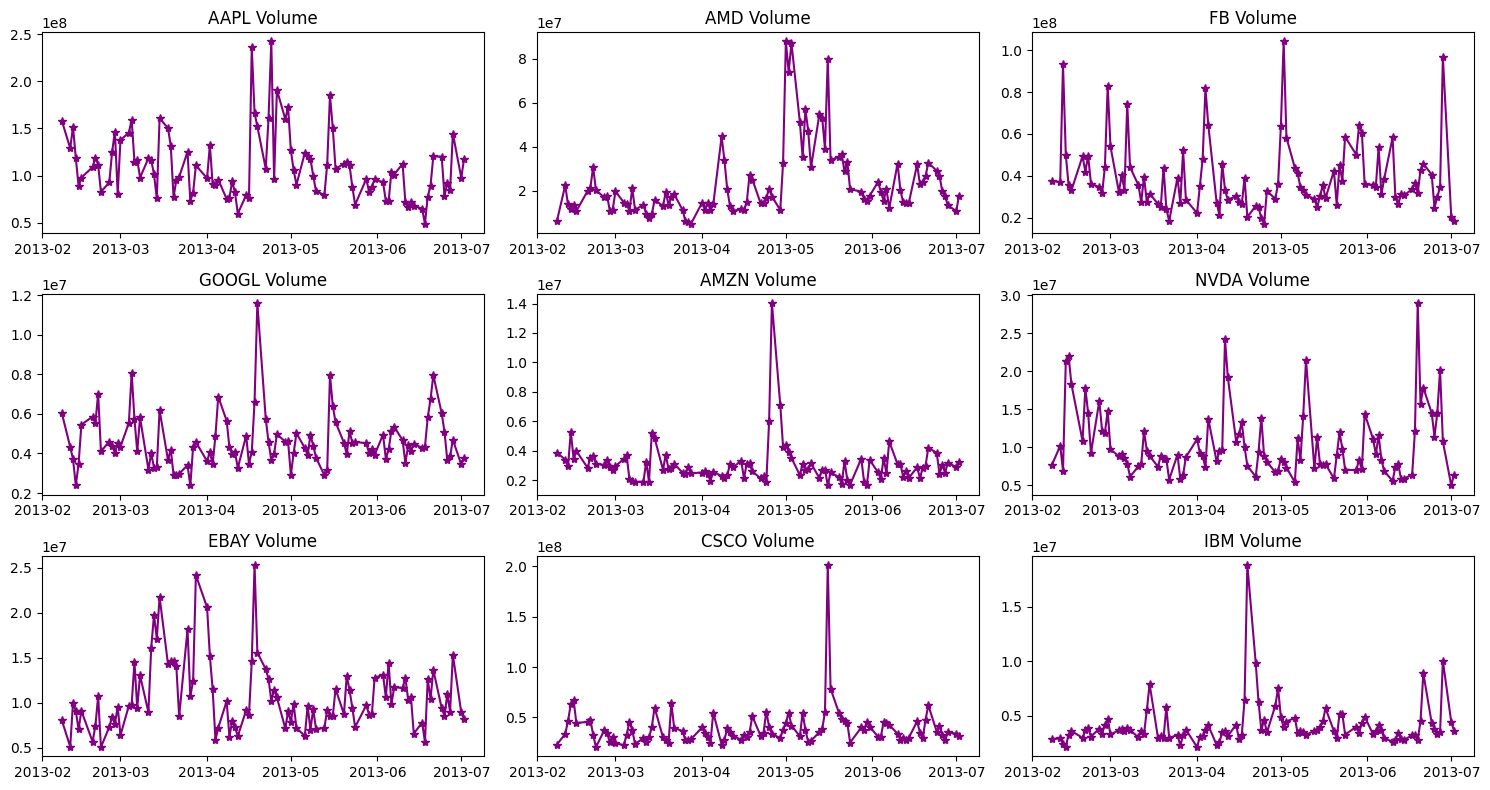

In [ ]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company][:100]
	plt.plot(c['date'], c['volume'], c='purple', marker='*')
	plt.title(f"{company} Volume")
	plt.tight_layout()


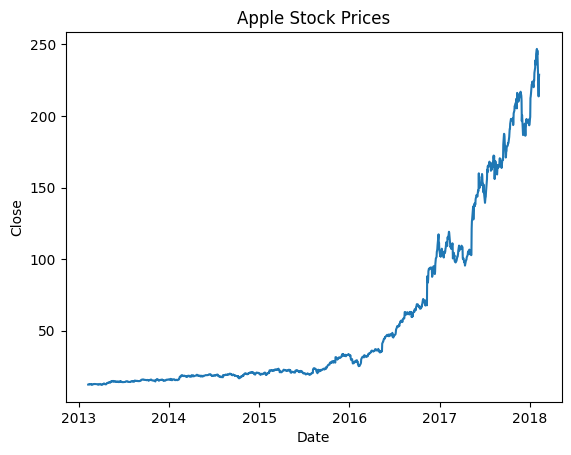

In [ ]:
nvidia = data[data['Name'] == 'NVDA']
prediction_range = nvidia.loc[(nvidia['date'] > datetime(2013,1,1))
& (nvidia['date']<datetime(2018,1,1))]
plt.plot(nvidia['date'],nvidia['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()


In [ ]:
close_data = nvidia.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data.shape)
train_data = scaled_data[0:training]
print(train_data.shape)
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i])
	y_train.append(train_data[i])
#print(x_train[0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)


(1259, 1)
(1197, 1)
(1137, 60, 1)
(1137, 60, 1)


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7f08f91f1840>>

In [ ]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=50)

Epoch 1/50
36/36 [==============================] - 8s 58ms/step - loss: 0.0122
Epoch 2/50
36/36 [==============================] - 2s 56ms/step - loss: 0.0034
Epoch 3/50
36/36 [==============================] - 2s 57ms/step - loss: 0.0033
Epoch 4/50
36/36 [==============================] - 2s 57ms/step - loss: 0.0029
Epoch 5/50
36/36 [==============================] - 3s 88ms/step - loss: 0.0025
Epoch 6/50
36/36 [==============================] - 3s 75ms/step - loss: 0.0026
Epoch 7/50
36/36 [==============================] - 2s 57ms/step - loss: 0.0030
Epoch 8/50
36/36 [==============================] - 2s 57ms/step - loss: 0.0022
Epoch 9/50
36/36 [==============================] - 2s 58ms/step - loss: 0.0026
Epoch 10/50
36/36 [==============================] - 2s 57ms/step - loss: 0.0025
Epoch 11/50
36/36 [==============================] - 3s 83ms/step - loss: 0.0020
Epoch 12/50
36/36 [==============================] - 3s 78ms/step - loss: 0.0020
Epoch 13/50
36/36 [==================

In [ ]:
test_data = scaled_data[training - 60:]
x_test = []
y_test = dataset[training:]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))
mape =  np.mean((abs(predictions - y_test))/y_test)
print("MAPE",mape)

2/2 [==============================] - 0s 47ms/step
MSE 237.07728521209327
RMSE 15.397314220736462
MAPE 0.06450794482813413


In [ ]:
# here we are using metrices to get the score for different evaluation schemes
score_1 = metrics.r2_score(y_test,predictions)

score_2 = metrics.mean_absolute_error(y_test,predictions)

print("R Squared Error: ",score_1)
print("Mean Absolute Error: ", score_2)

R Squared Error:  0.1761901481834688
Mean Absolute Error:  13.941594208748112


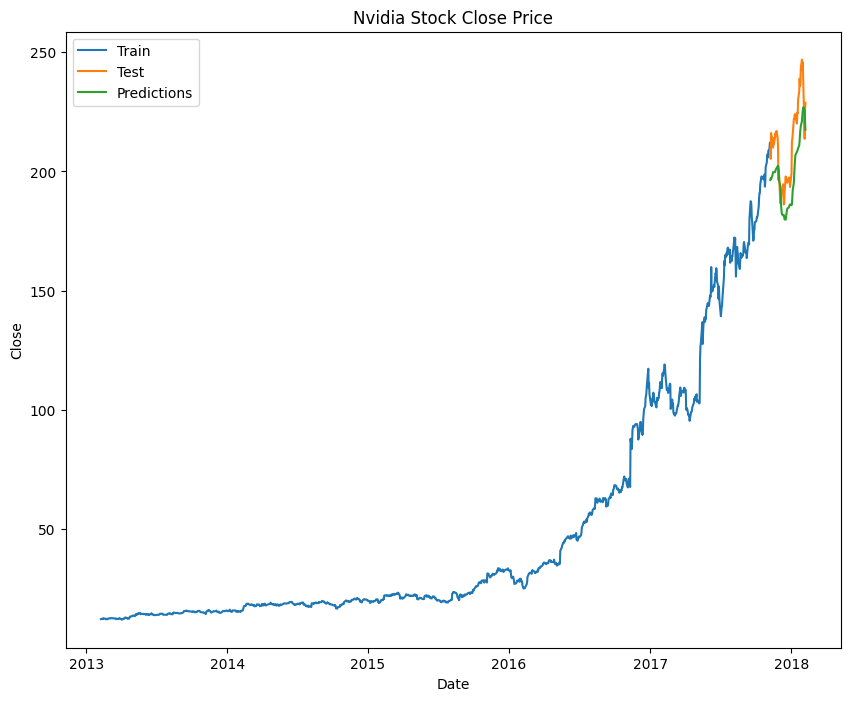

In [ ]:
train = nvidia[:training]
test = nvidia[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Nvidia Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])


In [ ]:
print(predictions[55],y_test[55])

[223.64677] [242.72]
